In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [3]:
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy
199999,es_0859809,product_es_0378794,reviewer_es_0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,es,home


In [7]:
data.shape

(200000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [9]:
data.product_category.value_counts()

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

In [31]:
# Ver cantidad de usuarios que valoraron con cada número estrellas las distintas categorías
# data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
from statistics import mean
data_grouped = data.stars.groupby([data['product_category']]).mean().reset_index(name='avg_stars')
data_grouped['rev_count'] = data.stars.groupby([data['product_category']]).count().astype(int).reset_index(name='rev_count').rev_count
data_grouped.sort_values(by='avg_stars')

,product_category,avg_stars,rev_count
16,lawn_and_garden,2.773189,4237
29,wireless,2.821834,25886
0,apparel,2.866829,5737
8,electronics,2.887626,10385
14,jewelry,2.930538,1598
3,beauty,2.935805,7337
1,automotive,2.950721,7143
11,home,2.980380,26962
23,pet_products,2.991112,3713
28,watch,3.001342,1490


In [27]:
# data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
# data_grouped

,product_category,stars,count
0,apparel,1,1273
1,apparel,2,1205
2,apparel,3,1200
3,apparel,4,1131
4,apparel,5,928
...,...,...,...
145,wireless,1,6283
146,wireless,2,5684
147,wireless,3,4797
148,wireless,4,4606


In [79]:
data.stars.value_counts()

1    40000
2    40000
3    40000
4    40000
5    40000
Name: stars, dtype: int64

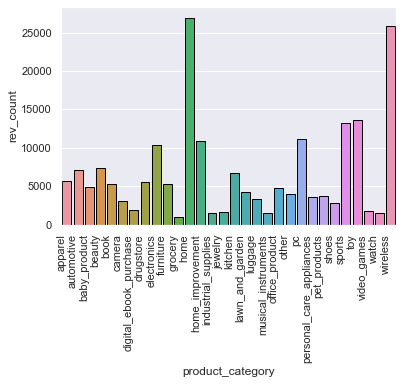

<Figure size 2160x1008 with 0 Axes>

In [36]:
# grafico = sns.countplot(x=data['product_category'],data=data, hue='stars')
grafico = sns.barplot(x=data_grouped.product_category.sort_values(), y=data_grouped.rev_count, linewidth=1,edgecolor=(0,0,0))
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=90, ha="right")
#plt.figure(figsize=(20,4))
# plt.bar(x=data['stars'], height=10,data=data)
plt.figure(figsize=(30,14))
plt.show()

In [26]:
data_grouped.product_category.sort_values()

0                      apparel
1                   automotive
2                 baby_product
3                       beauty
4                         book
5                       camera
6       digital_ebook_purchase
7                    drugstore
8                  electronics
9                    furniture
10                     grocery
11                        home
12            home_improvement
13         industrial_supplies
14                     jewelry
15                     kitchen
16             lawn_and_garden
17                     luggage
18         musical_instruments
19              office_product
20                       other
21                          pc
22    personal_care_appliances
23                pet_products
24                       shoes
25                      sports
26                         toy
27                 video_games
28                       watch
29                    wireless
Name: product_category, dtype: object

In [23]:
# Ver cuántos usuarios únicos publicaron
print("De las", data.shape[0],"reseñas, sólo", len(data.reviewer_id.unique()), "fueron hechas por usuarios únicos.")
print("Esto equivale al", len(data.reviewer_id.unique())/data.shape[0]*100,"%")

De las 200000 reseñas, sólo 179076 fueron hechas por usuarios únicos.
Esto equivale al 89.538 %


In [24]:
# Ver sobre cuántos productos únicos se publicaron reseñas
print("De las", data.shape[0],"reseñas, sólo se mencionan", len(data.product_id.unique()), "productos únicos.")
print("Esto equivale al", len(data.product_id.unique())/data.shape[0]*100,"%")

De las 200000 reseñas, sólo se mencionan 150938 productos únicos.
Esto equivale al 75.469 %


In [66]:
# Previamente
## python -m spacy download es
## python -m spacy download es_core_news_sm

import spacy # https://spacy.io/usage/models
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)
# Quitamos palabras como 'no', 'bueno', 'buena' que nos pueden ser últiles para predecir
stopwords_spacy.remove('no')
stopwords_spacy.remove('bueno')
stopwords_spacy.remove('buena')

In [38]:
#Stop Words de nltk
import nltk
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words('spanish'))

**Stopwords de spaCy:** https://github.com/explosion/spaCy/blob/master/spacy/lang/es/stop_words.py
<br> vs<br>
**Stopwords de NLTK:** https://github.com/Alir3z4/stop-words/blob/bd8cc1434faeb3449735ed570a4a392ab5d35291/spanish.txt

Está bastante mejor el de NLTK porque spaCy tiene palabras como "bueno" y "bien"

In [39]:
# Nos quedamos con las columnas del dataset que son relevantes para predecir la valoración en general
# Por eso se descartan las columnas de id de usuario y producto
# La de categoría nos puede servir para relacionar palabras
# La del idioma es redundante
df = data[['product_category','review_title','review_body','stars']]
df.head()

,product_category,review_title,review_body,stars
0,electronics,television Nevir,Nada bueno se me fue ka pantalla en menos de 8...,1
1,electronics,Dinero tirado a la basura con esta compra,"Horrible, nos tuvimos que comprar otro porque ...",1
2,drugstore,solo llega una unidad cuando te obligan a comp...,Te obligan a comprar dos unidades y te llega s...,1
3,wireless,PRODUCTO NO RECIBIDO.,"No entro en descalificar al vendedor, solo pue...",1
4,shoes,Devuelto,Llega tarde y co la talla equivocada,1


In [88]:
# Miramos una review al azar
random_index = np.random.randint(0,df.shape[0])
review = df.review_body.iloc[random_index]
title = df.review_title.iloc[random_index]
print(random_index, title, review)
print('Puntuación:',df.stars[random_index])

135750 Segura y funcional Segura, buen diseño y relación calidad-precio. Únicamente deberían mejorar las instrucciones, difícil montaje


In [90]:
# Reemplazamos
print(df.product_category[random_index],df.stars[random_index])

baby_product 4


In [99]:
#Constante de signos de puntuación
import string
puntua = string.punctuation + '¡¿'

#Función para limpieza de datos
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.strip()
        else:
            temp = token
        tokens.append(temp)
    
    clean_tokens = []
    for token in tokens:
        if str(token) not in stopwords_spacy and token not in puntua:
            clean_tokens.append(token)
    
    return clean_tokens

In [101]:
clean_review = text_data_cleaning(review)
clean_review

['Segura',
 'diseño',
 'y',
 'relación',
 'calidad-precio',
 'únicamente',
 'deber',
 'mejorar',
 'instrucción',
 'difícil',
 'montaje']

In [100]:
# Pasar todo a minúscula y quitar lo que no sea texto o espacio
import re
review_sin_punct = re.sub("[^a-zA-ZáéíóúÁÉÍÓÚÑñüÜ0-9]", " ", str(review.lower())) # re.sub(pattern, repl, string, count=0, flags=0) --> Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl.
title_sin_punct = re.sub("[^a-zA-ZáéíóúÁÉÍÓÚÑñüÜ0-9]", " ", str(title.lower()))
print(title_sin_punct,'\n',review_sin_punct,'\n')

# Tokenizar
doc = nlp(title_sin_punct + ' ' + review_sin_punct)
# print(doc)
rev = []
for token in doc:
    if(str(token) not in stopwords_spacy):
        rev.append(token)
        print(token)

segura y funcional 
 segura  buen diseño y relación calidad precio  únicamente deberían mejorar las instrucciones  difícil montaje 

segura
y
funcional
segura
 
diseño
y
relación
calidad
precio
 
únicamente
deberían
mejorar
instrucciones
 
difícil
montaje


In [97]:
# Lemmatización
rev_lemma = []
rev_lemma = [w.lemma_ for w in rev if not w.pos_ == 'SPACE'] # Lemmatizamos y filtramos espacios
rev_lemma

# rev_lemma.clear()

['seguro',
 'funcional',
 'seguro',
 'buen',
 'diseño',
 'relación',
 'calidad',
 'precio',
 'únicamente',
 'deber',
 'mejorar',
 'instrucción',
 'difícil',
 'montaje']

In [ ]:
# Quitamos palabras duplicadas si las hubiera
[res.append(x) for x in test_list if x not in res] 

In [55]:
# Cómo clasifica palabras lunfardas que pueden aparecer
palabra = 'fachero buenardo flashero flasheado cool malisimo malardo mina cana chavon'
palabra = nlp(palabra)
for t in palabra:
    print(t," - ",t.lemma_, " - ", t.pos_)

fachero  -  fachero  -  NOUN
buenardo  -  buenardo  -  ADJ
flashero  -  flashero  -  ADJ
flasheado  -  flasheado  -  ADJ
cool  -  cool  -  NOUN
malisimo  -  malisimo  -  ADJ
malardo  -  malardo  -  ADJ
mina  -  mina  -  NOUN
cana  -  cán  -  ADJ
chavon  -  chavon  -  ADV


## Vectorization Feature Engineering (TF-IDF)

In [102]:
# Importar librería de vectorización
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [104]:
# Definir la función de tokenizado y crear el REGRESOR
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
linear_reg = SVR(kernel='linear')

In [112]:
# Crear los vectores de datos de entrenamiento
X_train = df['review_body']
y_train = df['stars']

In [110]:
# Crear los vectores de datos de prueba
test_data = pd.read_json("dataset_amazon/dataset_es_test.json", lines = True)
test_data = test_data[['product_category','review_title','review_body','stars']]
X_test = test_data.review_body
y_test = test_data.stars

In [113]:
print("Cantidad de datos de entrenamiento:", X_train.shape)
print("Cantidad de datos de prueba:", X_test.shape)

Cantidad de datos de entrenamiento: (200000,)
Cantidad de datos de prueba: (5000,)
